# 🔥Fire Alarm Prediction

**The Challenge of Fire Detection**

The inadequate and delayed detection of fires in various environments poses a significant threat to lives, property, and the environment. Conventional fire detection systems cannot often promptly identify the onset of fires, leading to delayed response times and increased damage. Current solutions also tend to have a high rate of false alarms, causing unnecessary panic and resource allocation. Addressing this issue is critical for ensuring swift and accurate fire detection to prevent extensive damage and save lives.

**The Role of Technology in Fire Detection**

Researchers recognize the urgency of enhancing fire detection methodologies. Numerous studies and incidents highlight the need for more efficient, reliable, and real-time fire detection solutions. Advanced technologies like A.I. and machine learning offer promising avenues to address this challenge, garnering considerable attention and enthusiasm from both the research community and the wider society.


| No | Contents |
|:--:|:---------|
| 1  | Importing Libraries |
| 2  | About Dataset |
| 3  | Basic Exploration |
| 4  | Data Preprocessing |
| 5  | Custom Palette For Visualization |
| 6  | Temperature |
| 7  | Feature Analysis |
| 8 | Correlation Map |
| 9 | Model Creation & Performance Evaluation |
| 10 | Reference |

## IMPORTING LIBRARIES

In [ ]:
!pip install -q ptitprince

In [ ]:
!pip install -U seaborn==0.11

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ptitprince as pt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings('ignore')

## ABOUT DATASET

The dataset was gotten from Kaggle, and below is the information on the features of the dataset.

* **UTC:** Time when experiment was performed
* **Temperature[C]:** Temperature of surroundings, measured in celcius
* **Humidity[%]:** Air humidity during the experiment
* **TVOC[ppb]:** Total Volatile Organic Compounds, measured in ppb (parts per billion)
* **eCO2[ppm]:** CO2 equivalent concentration, measured in ppm (parts per million)
* **Raw H2:** The amount of Raw Hydrogen [Raw Molecular Hydrogen; not compensated (Bias, Temperature etc.)] present in surroundings
* **Raw Ethanol:** The amount of Raw Ethanol present in surroundings
* **Pressure[hPa]:** Air pressure, Measured in hPa
* **PM1.0:** Paticulate matter of diameter less than 1.0 micrometer
* **PM2.5:** Paticulate matter of diameter less than 2.5 micrometer
* **NC0.5:** Concentration of particulate matter of diameter less than 0.5 micrometer
* **NC1.0:** Concentration of particulate matter of diameter less than 1.0 micrometer
* **NC2.5:** Concentration of particulate matter of diameter less than 2.5 micrometer
* **CNT:** Sample Count. Fire Alarm(Reality) If fire was present then value is 1 else it is 0
* **Fire Alarm:** **1** means **Positive** and **0** means **Not Positive**

#### Upload the dataset

In [4]:
from google.colab import files
uploaded = files.upload()

Saving smoke_detection_iot.csv to smoke_detection_iot.csv


In [5]:
import io
data = pd.read_csv(io.BytesIO(uploaded['smoke_detection_iot.csv']), low_memory= False)

# BASIC EXPLORATION OF THE DATASET

In [6]:
print(f"Shape : {data.shape}")
data.head().style.set_properties(**{"background-color": "#004000","color":"#ddab46","border": "1.5px #5f0d11"})

Shape : (62630, 16)


,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000000,57.360000,0,400,12306,18520,939.735000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
1,1,1654733332,20.015000,56.670000,0,400,12345,18651,939.744000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0
2,2,1654733333,20.029000,55.960000,0,400,12374,18764,939.738000,0.000000,0.000000,0.000000,0.000000,0.000000,2,0
3,3,1654733334,20.044000,55.280000,0,400,12390,18849,939.736000,0.000000,0.000000,0.000000,0.000000,0.000000,3,0
4,4,1654733335,20.059000,54.690000,0,400,12403,18921,939.744000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB
None


### Dataset Summary

In [8]:
data.describe().style.set_properties(**{"background-color": "#004000","color":"#ddab46","border": "1.5px #5f0d11"})

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1654792066.184273,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,110002.488078,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1654712187.000000,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1654743244.250000,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1654761919.500000,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1654777576.750000,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1655130051.000000,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [9]:
# Check for duplicate entries and remove if there is any duplicate value
duplicate = data[data.duplicated()].shape[0]
print("Number of duplicates:",duplicate)

data.drop_duplicates(keep='first',inplace=True)

Number of duplicates: 0


In [10]:
# Check for null value in each entry
data.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#004000","color":"#ddab46","border": "1.5px #5f0d11"})

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Insight from the Dataset after observation

* No missing data entry
* No Null values



# DATA PREPARATION

In [11]:
# Rename columns to remove special characters and simplify names
data.rename(columns={
    "Temperature[C]": "Temperature",
    "Humidity[%]": "Humidity",
    "TVOC[ppb]": "TVOC",
    "eCO2[ppm]": "eCO2",
    "Pressure[hPa]": "Pressure"
}, inplace=True)

# Select a subset of columns from the DataFrame
data = data[["Temperature", "Humidity", "TVOC", "eCO2", "Raw H2", "Raw Ethanol", "Pressure", "PM1.0", "PM2.5", "NC0.5", "NC1.0", "NC2.5", "Fire Alarm"]]

# Display the first five rows of the DataFrame with styling
data.head().style.set_properties(**{"background-color": "#004000", "color": "#ddab46", "border": "1.5px #5f0d11"})

,Temperature,Humidity,TVOC,eCO2,Raw H2,Raw Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000000,57.360000,0,400,12306,18520,939.735000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,20.015000,56.670000,0,400,12345,18651,939.744000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,20.029000,55.960000,0,400,12374,18764,939.738000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,20.044000,55.280000,0,400,12390,18849,939.736000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,20.059000,54.690000,0,400,12403,18921,939.744000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [12]:
# Generate a descriptive statistics summary for the DataFrame and transpose it
desc_stats_transposed = data.describe().T

# Apply styling to the summary table with background color, text color, and border
styled_desc_stats = desc_stats_transposed.style.set_properties(**{"background-color": "#004000", "color": "#ddab46", "border": "1.5px #5f0d11"})

# Display the styled summary table
styled_desc_stats

,count,mean,std,min,25%,50%,75%,max
Temperature,62630.000000,15.970424,14.359576,-22.010000,10.994250,20.130000,25.409500,59.930000
Humidity,62630.000000,48.539499,8.865367,10.740000,47.530000,50.150000,53.240000,75.200000
TVOC,62630.000000,1942.057528,7811.589055,0.000000,130.000000,981.000000,1189.000000,60000.000000
eCO2,62630.000000,670.021044,1905.885439,400.000000,400.000000,400.000000,438.000000,60000.000000
Raw H2,62630.000000,12942.453936,272.464305,10668.000000,12830.000000,12924.000000,13109.000000,13803.000000
Raw Ethanol,62630.000000,19754.257912,609.513156,15317.000000,19435.000000,19501.000000,20078.000000,21410.000000
Pressure,62630.000000,938.627649,1.331344,930.852000,938.700000,938.816000,939.418000,939.861000
PM1.0,62630.000000,100.594309,922.524245,0.000000,1.280000,1.810000,2.090000,14333.690000
PM2.5,62630.000000,184.467770,1976.305615,0.000000,1.340000,1.880000,2.180000,45432.260000
NC0.5,62630.000000,491.463608,4265.661251,0.000000,8.820000,12.450000,14.420000,61482.030000


### Correlation Matrix

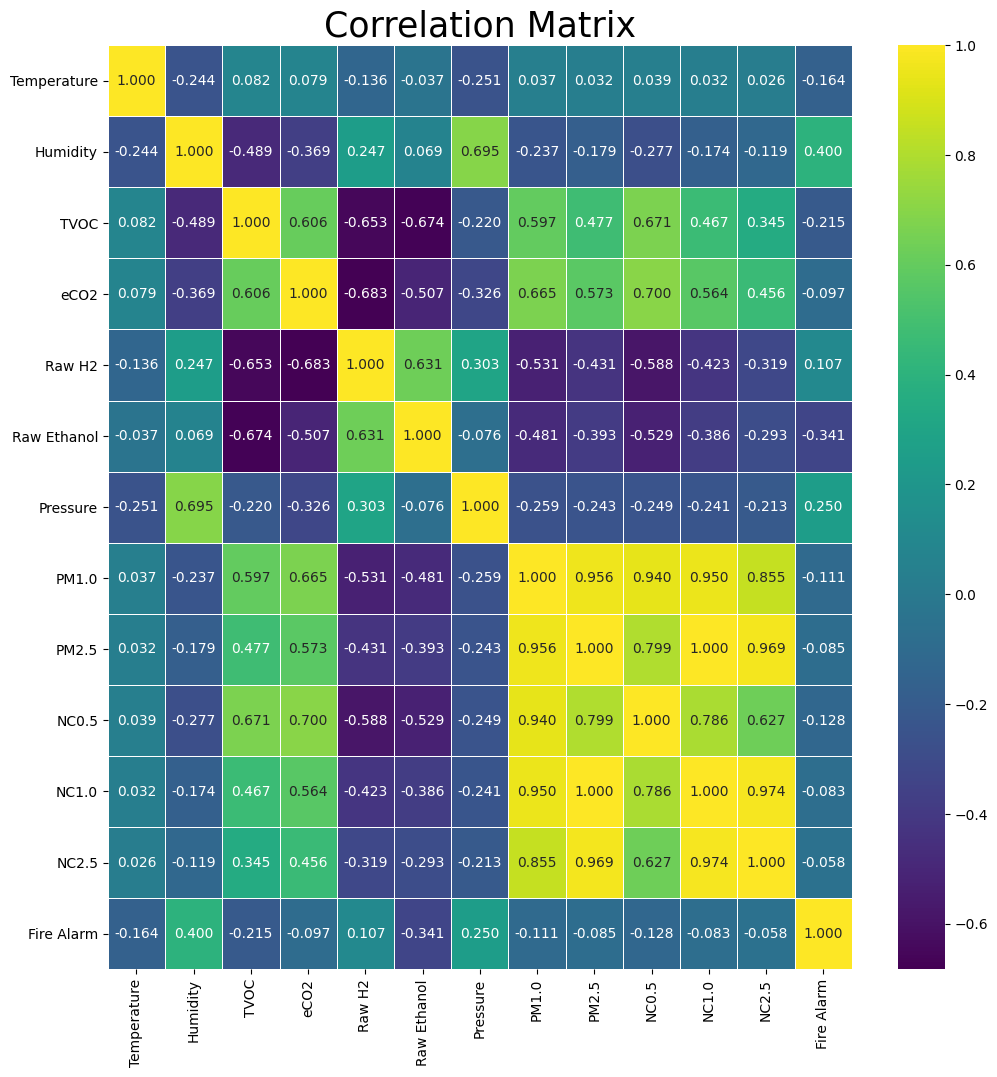

In [13]:
# Identify categorical columns in the 'data' DataFrame
catcol = [col for col in data.columns if data[col].dtype == "object"]

# Create a LabelEncoder object to encode categorical variables
le = LabelEncoder()

# Encode each categorical column in the DataFrame
for col in catcol:
    data[col] = le.fit_transform(data[col])

# Set up a subplot with a specified figure size
plt.subplots(figsize=(12, 12))

# Create a heatmap of the correlation matrix
sns.heatmap(data.corr(), annot=True, cmap='viridis', fmt=".3f", linewidths=.5)

# Set the title and adjust the rotation of axis labels
plt.title("Correlation Matrix", fontsize=25)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Display the heatmap
plt.show()


### Insights

The insights gotten from the correlation matrix are as follows:

1. No significant correlation observed between the target feature and other variables.
2. Small positive correlations with Humidity and Pressure.
3. Small negative correlations with TVOC and Raw Ethanol.
4. High positive correlations observed between eCO2 and TVOC, PM1.0, NC0.5, Pressure, and Humidity.
5. High positive correlations observed between TVOC and NC0.5, Raw H2, and Raw Ethanol.
6. High positive correlations observed between PM1.0 and eCO2, PM2.5, NC0.5, NC1.0, and NC2.5.
7. High positive correlations observed between PM2.5 and NC0.5, NC1.0, and NC2.5.
8. High positive correlations observed between NC0.5 and NC1.0, and NC2.5.

# MODEL CREATION

### Standardization

In [14]:
# Extract features (x) and target variable (y) from the 'data' DataFrame
x = data.drop(["Fire Alarm"], axis=1)
y = data["Fire Alarm"]

# Create a StandardScaler object to standardize the features
sc = StandardScaler()

# Standardize the features using the fit_transform method
x = sc.fit_transform(x)

### Data spliting, 80% for training while 20% for testing

In [15]:
# Split the data into training and testing sets using train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print(f"Training data shape: {x_train.shape}, {y_train.shape}")
print(f"Testing data shape: {x_test.shape}, {y_test.shape}")

Training data shape: (50104, 12), (50104,)
Testing data shape: (12526, 12), (12526,)


#### In the following steps, different models will bee used in training, and the best model will be the one to be used for the final project


## Logistic Regression

In [16]:
# Create a Logistic Regression classifier
lr = LogisticRegression()

# Train the Logistic Regression classifier on the training data
lr.fit(x_train, y_train)

# Make predictions on the test data
lr_pred = lr.predict(x_test)

# Compute the confusion matrix for the Logistic Regression predictions
lr_conf = confusion_matrix(y_test, lr_pred)

# Generate a classification report for the Logistic Regression predictions
lr_report = classification_report(y_test, lr_pred)

# Calculate the accuracy of the Logistic Regression classifier
lr_acc = round(accuracy_score(y_test, lr_pred) * 100, 2)

# Print the confusion matrix, classification report, and accuracy
print(f"Confusion Matrix:\n{lr_conf}")
print(f"Classification Report:\n{lr_report}")
print(f"Accuracy: {lr_acc}%")

Confusion Matrix:
[[2731  863]
 [ 447 8485]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      3594
           1       0.91      0.95      0.93      8932

    accuracy                           0.90     12526
   macro avg       0.88      0.85      0.87     12526
weighted avg       0.89      0.90      0.89     12526

Accuracy: 89.54%


## Bernoulli Naive Bayes

In [17]:
# Create a Bernoulli Naive Bayes classifier
bn = BernoulliNB()

# Train the Bernoulli Naive Bayes classifier on the training data
bn.fit(x_train, y_train)

# Make predictions on the test data
bn_pred = bn.predict(x_test)

# Compute the confusion matrix for the Bernoulli Naive Bayes predictions
bn_conf = confusion_matrix(y_test, bn_pred)

# Generate a classification report for the Bernoulli Naive Bayes predictions
bn_report = classification_report(y_test, bn_pred)

# Calculate the accuracy of the Bernoulli Naive Bayes classifier
bn_acc = round(accuracy_score(y_test, bn_pred) * 100, 2)

# Print the confusion matrix, classification report, and accuracy
print(f"Confusion Matrix:\n{bn_conf}")
print(f"Classification Report:\n{bn_report}")
print(f"Accuracy: {bn_acc}%")

Confusion Matrix:
[[2355 1239]
 [ 241 8691]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.66      0.76      3594
           1       0.88      0.97      0.92      8932

    accuracy                           0.88     12526
   macro avg       0.89      0.81      0.84     12526
weighted avg       0.88      0.88      0.88     12526

Accuracy: 88.18%


## Gaussian Naive Bayes

In [18]:
# Create a Gaussian Naive Bayes classifier
gn = GaussianNB()

# Train the Gaussian Naive Bayes classifier on the training data
gn.fit(x_train, y_train)

# Make predictions on the test data
gn_pred = gn.predict(x_test)

# Compute the confusion matrix for the Gaussian Naive Bayes predictions
gn_conf = confusion_matrix(y_test, gn_pred)

# Generate a classification report for the Gaussian Naive Bayes predictions
gn_report = classification_report(y_test, gn_pred)

# Calculate the accuracy of the Gaussian Naive Bayes classifier
gn_acc = round(accuracy_score(y_test, gn_pred) * 100, 2)

# Print the confusion matrix, classification report, and accuracy
print(f"Confusion Matrix:\n{gn_conf}")
print(f"Classification Report:\n{gn_report}")
print(f"Accuracy: {gn_acc}%")

Confusion Matrix:
[[ 870 2724]
 [ 236 8696]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.24      0.37      3594
           1       0.76      0.97      0.85      8932

    accuracy                           0.76     12526
   macro avg       0.77      0.61      0.61     12526
weighted avg       0.77      0.76      0.72     12526

Accuracy: 76.37%


## Random Forest

In [19]:
# Create a Random Forest classifier with 100 estimators and a random state of 42
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier on the training data
rf.fit(x_train, y_train)

# Make predictions on the test data
rf_pred = rf.predict(x_test)

# Compute the confusion matrix for the Random Forest predictions
rf_conf = confusion_matrix(y_test, rf_pred)

# Generate a classification report for the Random Forest predictions
rf_report = classification_report(y_test, rf_pred)

# Calculate the accuracy of the Random Forest classifier
rf_acc = round(accuracy_score(y_test, rf_pred) * 100, 2)

# Print the confusion matrix, classification report, and accuracy
print(f"Confusion Matrix:\n{rf_conf}")
print(f"Classification Report:\n{rf_report}")
print(f"Accuracy: {rf_acc}%")

Confusion Matrix:
[[3594    0]
 [   0 8932]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3594
           1       1.00      1.00      1.00      8932

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526

Accuracy: 100.0%


## XGB

In [20]:
# Create an XGBoost classifier with use_label_encoder set to False
xgb = XGBClassifier(use_label_encoder=False)

# Train the XGBoost classifier on the training data
xgb.fit(x_train, y_train)

# Make predictions on the test data
xgb_pred = xgb.predict(x_test)

# Compute the confusion matrix for the XGBoost predictions
xgb_conf = confusion_matrix(y_test, xgb_pred)

# Generate a classification report for the XGBoost predictions
xgb_report = classification_report(y_test, xgb_pred)

# Calculate the accuracy of the XGBoost classifier
xgb_acc = round(accuracy_score(y_test, xgb_pred) * 100, 2)

# Print the confusion matrix, classification report, and accuracy
print(f"Confusion Matrix:\n{xgb_conf}")
print(f"Classification Report:\n{xgb_report}")
print(f"Accuracy: {xgb_acc}%")

Confusion Matrix:
[[3594    0]
 [   1 8931]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3594
           1       1.00      1.00      1.00      8932

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526

Accuracy: 99.99%


## Neural Network

In [21]:
# Set the regularization parameter
regularization_parameter = 0.003

# Define the neural network model architecture
neural_model = Sequential([
    # Input layer with 32 units, ReLU activation, and L1 regularization
    tf.keras.layers.Dense(units=32, input_dim=(x_train.shape[-1]), activation="relu", kernel_regularizer=regularizers.l1(regularization_parameter)),

    # Hidden layer with 64 units, ReLU activation, and L1 regularization
    tf.keras.layers.Dense(units=64, activation="relu", kernel_regularizer=regularizers.l1(regularization_parameter)),

    # Hidden layer with 128 units, ReLU activation, and L1 regularization
    tf.keras.layers.Dense(units=128, activation="relu", kernel_regularizer=regularizers.l1(regularization_parameter)),

    # Dropout layer with a dropout rate of 0.3 to prevent overfitting
    tf.keras.layers.Dropout(0.3),

    # Hidden layer with 16 units, ReLU activation, and L1 regularization
    tf.keras.layers.Dense(units=16, activation="relu", kernel_regularizer=regularizers.l1(regularization_parameter)),

    # Output layer with 1 unit and sigmoid activation for binary classification
    tf.keras.layers.Dense(units=1, activation="sigmoid")
])

# Print the summary of the neural network architecture
print(neural_model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 16)                2064      
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12929 (50.50 KB)
Trainable params: 12929 (

In [22]:
# Define a custom callback to stop training if accuracy reaches 100%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        # Check if accuracy is 100%
        if logs.get("accuracy") == 1.0:
            # Print a message and stop training
            print("\nAccuracy is 100%, so canceling training!")
            self.model.stop_training = True

# Instantiate the custom callback
callbacks = myCallback()

# Compile the neural network model
neural_model.compile(optimizer=Adam(learning_rate=0.001),
                     loss="binary_crossentropy",
                     metrics=["accuracy"])

# Train the neural network model with early stopping callback
history = neural_model.fit(x_train, y_train,
                           epochs=60,
                           verbose=1,
                           batch_size=64,
                           validation_data=(x_test, y_test),
                           callbacks=[callbacks])

Epoch 1/60
783/783 [==============================] - 5s 4ms/step - loss: 0.8312 - accuracy: 0.9114 - val_loss: 0.3056 - val_accuracy: 0.9603
Epoch 2/60
783/783 [==============================] - 4s 5ms/step - loss: 0.2732 - accuracy: 0.9589 - val_loss: 0.2349 - val_accuracy: 0.9620
Epoch 3/60
783/783 [==============================] - 4s 6ms/step - loss: 0.2283 - accuracy: 0.9623 - val_loss: 0.2086 - val_accuracy: 0.9675
Epoch 4/60
783/783 [==============================] - 4s 5ms/step - loss: 0.2123 - accuracy: 0.9653 - val_loss: 0.1981 - val_accuracy: 0.9677
Epoch 5/60
783/783 [==============================] - 3s 4ms/step - loss: 0.2028 - accuracy: 0.9659 - val_loss: 0.1890 - val_accuracy: 0.9695
Epoch 6/60
783/783 [==============================] - 3s 4ms/step - loss: 0.1977 - accuracy: 0.9671 - val_loss: 0.1876 - val_accuracy: 0.9675
Epoch 7/60
783/783 [==============================] - 4s 5ms/step - loss: 0.1914 - accuracy: 0.9676 - val_loss: 0.1801 - val_accuracy: 0.9702
Epoch 

## Comparison of all the models and going for the best model.

392/392 [==============================] - 1s 2ms/step
Model Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.895418   0.907681  0.949955  0.928337
1         Bernoulli NB  0.881846   0.875227  0.973018  0.921535
2          Gaussian NB  0.763692   0.761471  0.973578  0.854560
3        Random Forest  1.000000   1.000000  1.000000  1.000000
4              XGBoost  0.999920   1.000000  0.999888  0.999944
5       Neural Network  0.995370   0.993548  1.000000  0.996764


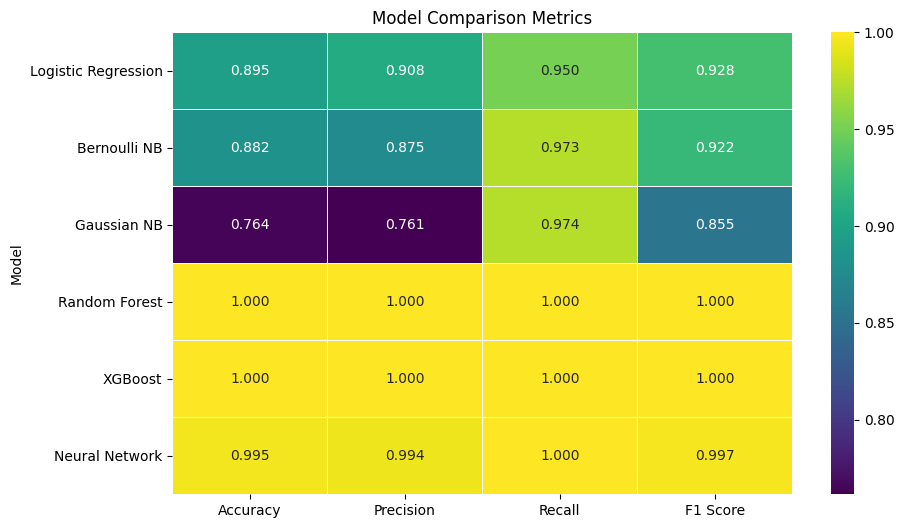

In [23]:
models = ['Logistic Regression', 'Bernoulli NB', 'Gaussian NB', 'Random Forest', 'XGBoost', 'Neural Network']
results = []

neural_pred_probs = neural_model.predict(x_test)
neural_pred = np.round(neural_pred_probs).flatten()

# Update the loop to use neural_pred
for i, model in enumerate([lr_pred, bn_pred, gn_pred, rf_pred, xgb_pred, neural_pred]):
    accuracy = accuracy_score(y_test, model)
    report = classification_report(y_test, model, output_dict=True)
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1 = report['1']['f1-score']

    results.append({
        'Model': models[i],
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })


# Create a DataFrame for comparison
results_df = pd.DataFrame(results)

# Display the results
print("Model Comparison:")
print(results_df)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(results_df.set_index('Model'), annot=True, cmap='viridis', fmt=".3f", linewidths=.5)
plt.title('Model Comparison Metrics')
plt.show()


## Insights
According to the result displayed above, the following are the insights.

*   Both XGBoost and Random Forest are overfitting, these could be because of the dataset (Couldn't find a larger dataset).
*   The Neural Network Seem to be the best model out of all the models (It will be the model that will be chosen for this fire alarm detection).



## CHOSEN MODEL

The Neural Network will be chosen based on the following reasons:

**Complex Relationship Handling**: Neural networks are powerful models that can handle complex relationships and patterns in the data. The multiple hidden layers allow the model to learn intricate feature representations, making it suitable for capturing nuanced dependencies in your dataset.

**Non-linearity**: Neural networks introduce non-linearities through activation functions, enabling them to model non-linear relationships in the data. This is crucial for real-world problems that may not adhere to linear patterns, providing the flexibility needed to capture diverse patterns.

**High Accuracy**: The neural network achieved a high accuracy of 99% on the validation set. This indicates that the model has successfully learned and generalized the underlying patterns in the data, making it a reliable predictor for new, unseen samples.

**Consistent Training Performance**: Throughout the 60 epochs, the model's accuracy consistently improved, and the loss consistently decreased. This stability in training suggests that the model is learning effectively without overfitting the training data.

**Generalization to Unseen Data**: The model's performance on the validation set, or unseen data, is impressive with an accuracy of 99.88%. This suggests that the neural network is not only memorizing the training data but is also generalizing well to new, previously unseen samples.

**Regularization Techniques**: The inclusion of dropout layers in the neural network serves as a form of regularization, helping to prevent overfitting. Regularization is crucial for ensuring that the model generalizes well to new data instead of memorizing the training set.

**Comprehensive Evaluation Metrics**: In addition to accuracy, you considered precision, recall, and F1 score for a more comprehensive evaluation. The model exhibited high precision, recall, and F1 score, indicating its effectiveness in correctly identifying positive instances while minimizing false positives and false negatives.

**Understanding the Problem Complexity**: Neural networks are particularly effective when dealing with complex problems that involve intricate patterns and dependencies. Given the nature of your dataset, the neural network's ability to capture complex relationships makes it a suitable choice.

**Learning Rate Adaptation**: The learning rate during training appears appropriate, leading to smooth convergence without significant fluctuations in accuracy or loss. This is a positive indicator that the model is finding the optimal parameters.



## Download Model

In [24]:
# Save the trained neural network model
neural_model.save("path/to/save/neural_model")

In [25]:
! pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.3 MB/s eta 0:00:00


In [27]:
!wget -q -O - ipv4.icanhazip.com

35.227.2.12


In [28]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.227.2.12:8501

npx: installed 22 in 4.827s
your url is: https://mean-symbols-smell.loca.lt
  Stopping...
^C
